In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [5]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [1, 2, 3]].values # Feature columns, here assuming columns 1, 2, and 3 are relevant features
y = dataset.iloc[:, -1].values # Target column, assuming the last column is the target variable

In [ ]:
print("Length of X: ",len(X),len(y))

400 400


In [7]:
# Encoding categorical data, means converting text to numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [9]:
# Feature Scaling, standardizing the values, for example age 19 and 35 are very different but income 15000 and 80000 are very different
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [10]:
# Fitting K-NN to the Training set, here we are using 5 nearest neighbors and Euclidean distance
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred) 
print("Confusion MAtrix:\n ", cm)
print("Accuracy of model:",ac)

Confusion MAtrix:
  [[55  3]
 [ 1 21]]
Accuracy of model: 0.95


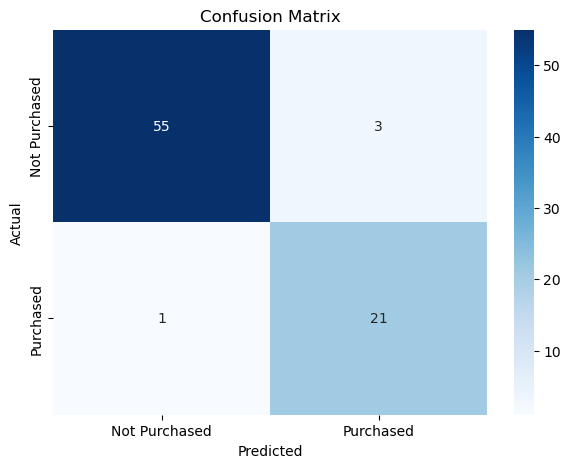

In [ ]:
#plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
#in above, annot=True means to annotate cells with numeric value, fmt='d' means format as integer
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()